In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [37]:

# Load the breast cancer dataset from 'data.csv'
df = pd.read_csv('data.csv')

# Display summary statistics and the first few rows of the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [38]:
# Display some rows to get a better idea of the contents

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data Cleaning

In [39]:
# Drop unnecessary columns and map 'diagnosis' to numerical values
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Select features for visualization and splitting
features_mean = list(df.columns[1:11])
dfMalignant = df[df['diagnosis'] == 1]
dfBenign = df[df['diagnosis'] == 0]

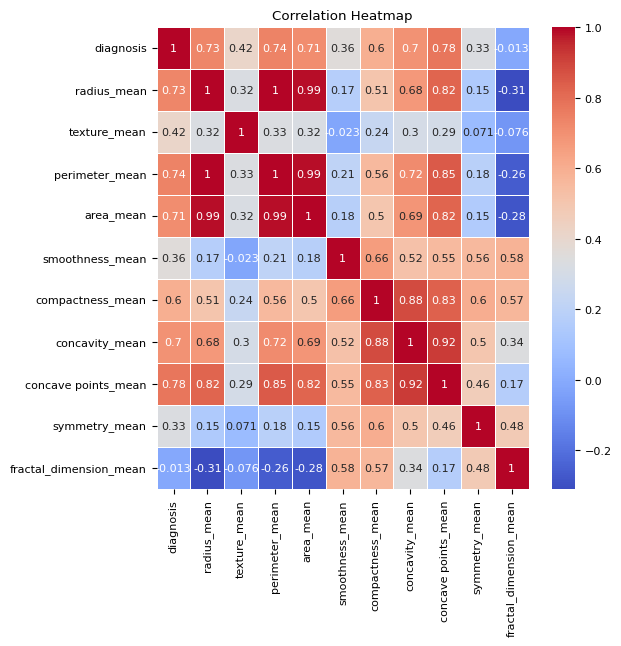

In [40]:
avg_df = df.drop(df.columns[[i for i in range (11,31)]], axis=1)
plt.figure(figsize=(6, 6))
sns.heatmap(avg_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 600x600 with 0 Axes>

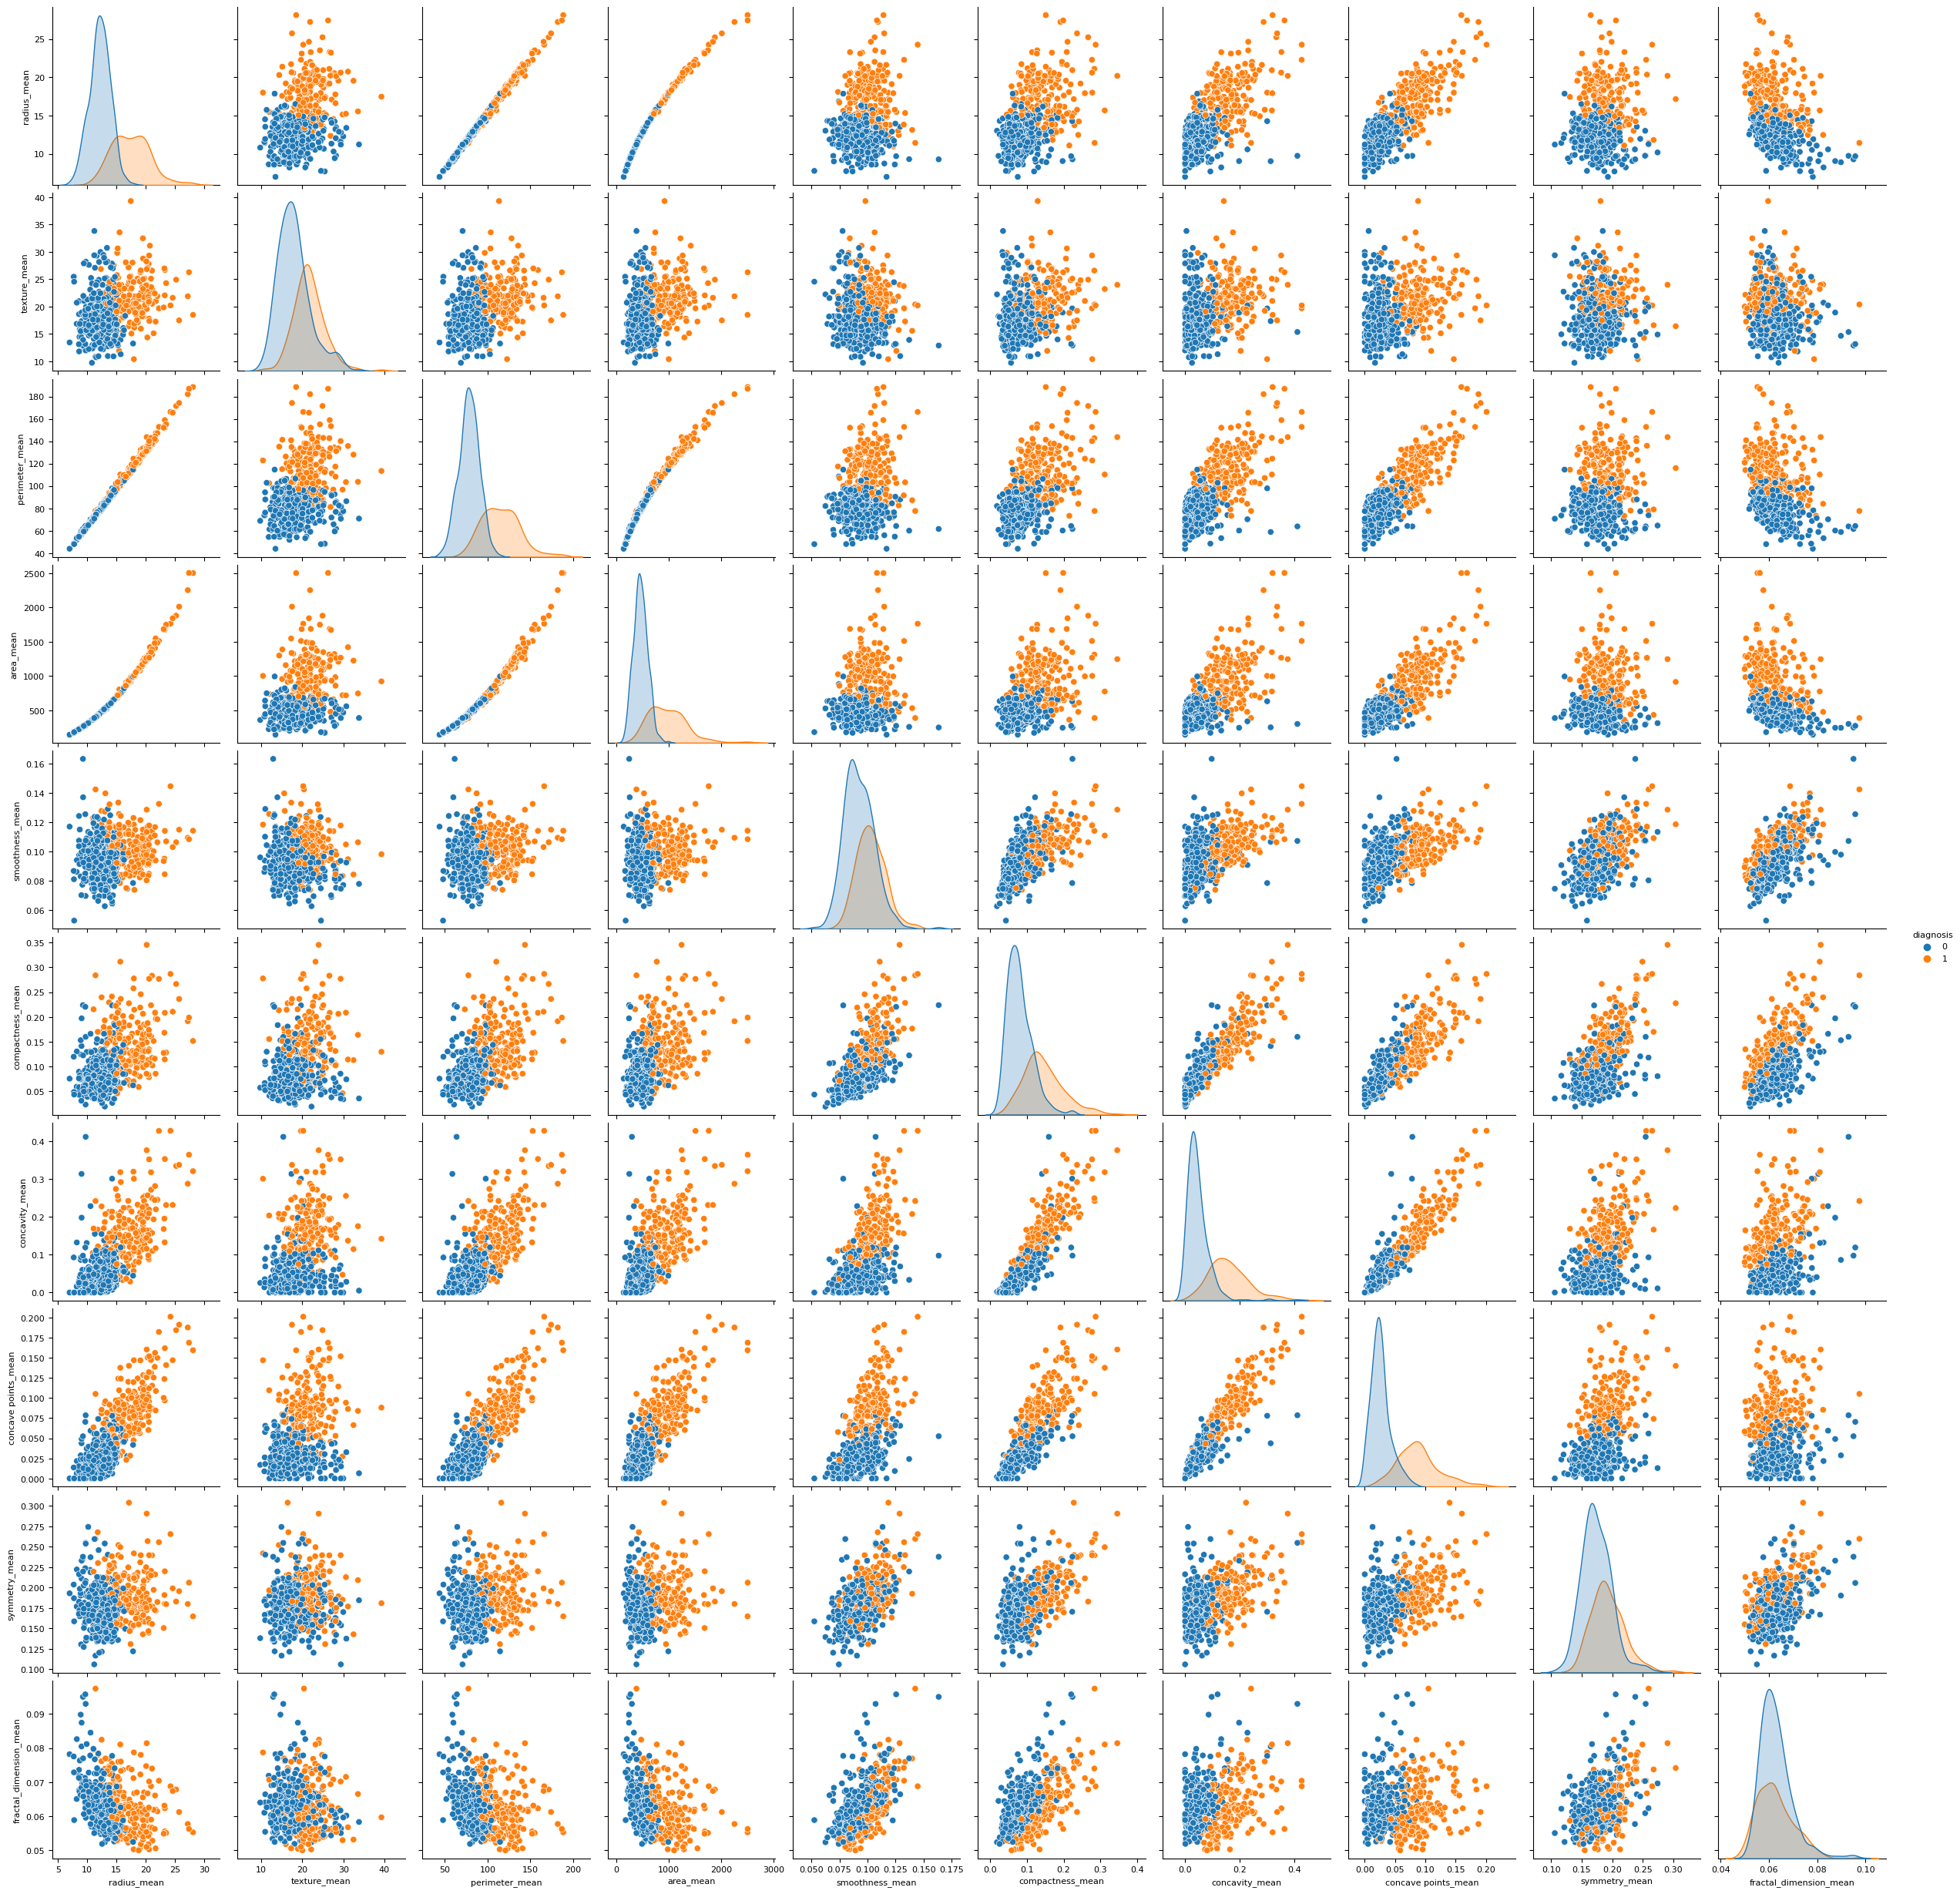

In [41]:
plt.figure(figsize=(6, 6))
sns.pairplot(df, hue='diagnosis', vars=features_mean)
plt.show()

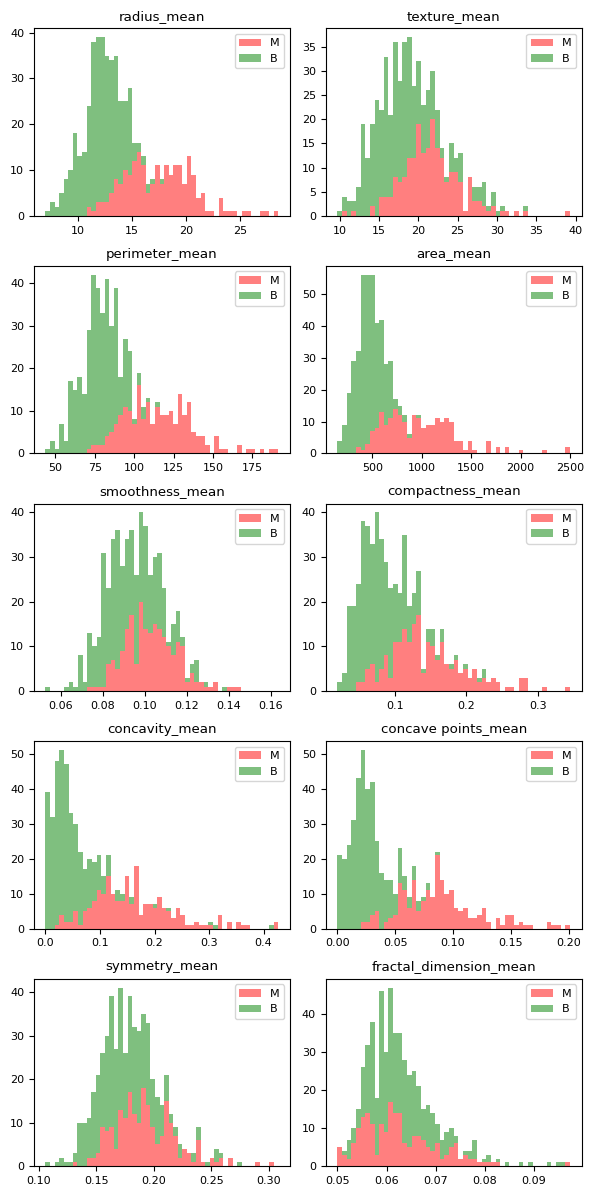

In [42]:
# Create visualizations for comparing benign and malignant tumors
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(6, 12))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.figure
    binwidth = (max(df[features_mean[idx]]) - min(df[features_mean[idx]])) / 50
    ax.hist([dfMalignant[features_mean[idx]], dfBenign[features_mean[idx]]],
            bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth),
            alpha=0.5, stacked=True, label=['M', 'B'], color=['r', 'g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

## Observations

1. The analysis of mean values pertaining to crucial cell characteristics—specifically, cell radius, perimeter, area, compactness, concavity, and concave points—reveals noteworthy trends that hold promise for robust cancer classification. Notably, an escalating trend in these features is discernible in tandem with malignant tumor instances. This pronounced correlation underscores the potential utility of these features in distinguishing malignancy.

2. In contrast, the examination of mean values related to texture, smoothness, symmetry, and fractal dimension does not distinctly favor either diagnostic outcome. The histograms illustrating these features exhibit a relatively even distribution, lacking conspicuous outliers that would necessitate immediate remedial intervention. This characteristic suggests a balanced representation of these features within the dataset and minimizes the need for additional outlier treatment or data refinement procedures.


In [43]:
# Split the dataset into training and testing sets
traindf, testdf = train_test_split(df, test_size=0.3)

In [44]:
# Define a generic function for classification model evaluation
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors], data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Accuracy: %s" % "{0:.3%}".format(accuracy))


### Logistic Regression Model

Logistic regression serves as a prevalent method for handling the classification of discrete data, often applied to binary (1, 0) categorization.

Drawing insights from the histograms' patterns, we can reasonably posit that the diagnosis of cancer hinges upon specific key attributes—namely, the mean cell radius, mean perimeter, mean area, mean compactness, mean concavity, and mean concave points. Guided by these discerning observations, we proceed to conduct a logistic regression analysis, utilizing these pivotal features in the ensuing manner:


In [45]:
# Logistic Regression with selected features
predictor_var = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concave points_mean']
outcome_var = 'diagnosis'
model = LogisticRegression()
classification_model(model, traindf, predictor_var, outcome_var)


Accuracy: 88.693%


In [46]:
# Decision Tree with selected features
model = DecisionTreeClassifier()
classification_model(model, traindf, predictor_var, outcome_var)


Accuracy: 100.000%


## Refining Model Complexity

The observed over-fitting of the model may be attributed to the considerable number of predictors in play. To address this concern, a more focused approach is warranted. For instance, we can streamline our analysis by employing a single predictor, and the most intuitively compelling choice is the cell radius.

By opting for this refined strategy, we aim to achieve a more parsimonious model that retains interpretability while mitigating the risk of overfitting.


In [47]:
# Random Forest with selected features
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, traindf, predictor_var, outcome_var)


Accuracy: 93.216%


In [48]:
# Feature importances from Random Forest
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

concave points_mean    0.271124
area_mean              0.268996
perimeter_mean         0.219382
radius_mean            0.202332
compactness_mean       0.038166
dtype: float64


In [49]:
# Random Forest with top 5 features
predictor_var = ['concave points_mean', 'area_mean', 'radius_mean', 'perimeter_mean', 'concavity_mean']
classification_model(model, traindf, predictor_var, outcome_var)


Accuracy: 93.719%


In [50]:

# Random Forest with single feature
predictor_var = ['radius_mean']
classification_model(model, traindf, predictor_var, outcome_var)


Accuracy: 89.950%


In [51]:
# Random Forest with all features on the testing set
predictor_var = features_mean
classification_model(model, testdf, predictor_var, outcome_var)

Accuracy: 96.491%


## Conclusion

In this analysis, the optimal model identified for breast cancer diagnosis is the Random Forest model. Utilizing the top five predictors—'concave points_mean,' 'area_mean,' 'radius_mean,' 'perimeter_mean,' and 'concavity_mean'—this model attains a commendable prediction accuracy of approximately 95%. Additionally, the cross-validation score for the test dataset stands at around 93%.

As this study progresses, there exists potential for further refinement and enhancement of model performance. Future iterations of this analysis may encompass fine-tuning the existing model parameters and exploring alternative modeling techniques, with the overarching objective of achieving even more robust diagnostic outcomes.
